# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: $<$insert name here$>$ 
***

This assignment is due on Canvas by **11.59 PM on Wednesday, March 20**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course

## Part 1: Lasso and Ridge regression - 30 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms.

You will be using the following data sets:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [20]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

In [21]:
# 1A
print("1A")
#TODO

# 1B
print("1B")
#TODO

# 1C
print("1C")
#TODO

# 1D
print("1D")
#TODO

1A
1B
1C
1D


1.
E) $<$your answer here$>$

2. Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiment above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

In [22]:
# 2A
print("2A")
#TODO

# 2B
print("2B")
#TODO

# 2C
print("2C")
#TODO

# 2D
print("2D")
#TODO

2A
2B
2C
2D


2.
E) $<$your answer here$>$

3. Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

$<$Your Answer Here$>$

## Part 2: Visualizing Data and Decision Boundaries for different kernels - 30 points

### A. Training SVM with Linear Kernel (Dataset 1)

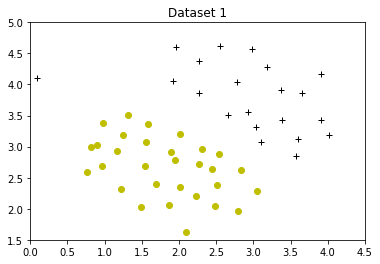

In [23]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

**A:** In `data1.mat`, most of the positive and negative examples can be separated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Feel free to experiment with different values of C and see what effect it has on the decision boundary. However finally train your classifier with C = 1

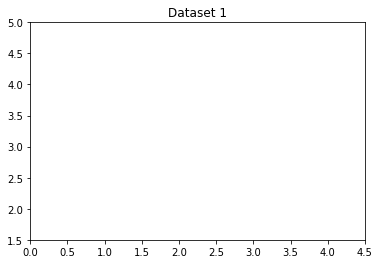

In [24]:
# SOLUTION 
from sklearn import svm
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)
# 1. Create a linear SVM classifier
# 2. Fit the model according to the given training data.
# 3. Print the mean accuracy on the given train data and labels using the score function in scikit-learn
### END CODE HERE ### 

plt.figure()
# Uncomment the below line after you build your classifier
# visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

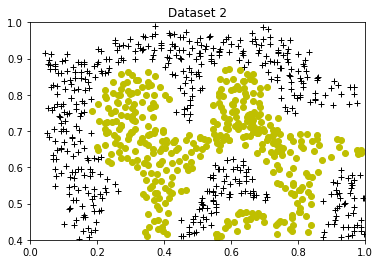

In [25]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`

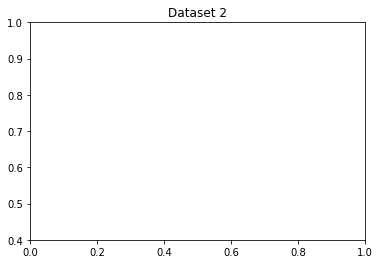

In [26]:
from visualize_boundary import visualize_boundary

# SVM Parameters to be used
C = 100
gamma = 10

### START CODE HERE ### (approx. 3 lines)
# 1. Create a SVM classifier with kernel='rbf'
# 2. Fit the model according to the given training data.
# 3. Print the mean accuracy on the given train data and labels using the score function in scikit-learn
### END CODE HERE ### 

plt.figure()
# Uncomment the below line after you build your classifier
# visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

For this task, you will be implement the Kernel Perceptron using different kernel functions. You will then use the training and test data provided below to train and test your implementation. Finally you will have to report the error rate as a percentage for each kernel function.

**A:** Implement the kernel functions below:

In [27]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    #  TODO
    pass
    

def polynomial_kernel(x, y, p = 3):
    #  TODO
    #  p = degree of the polynomial
    pass
    
def gaussian_kernel(x, y, sigma = 0.5):
    #     TODO:
    pass

In [28]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        """
        Test the linear kernel
        """
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        """
        Test the polynomial kernel
        """
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
        
    def test_gaussian_kernel(self):
        """
        Test the gaussian kernel
        """
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    

tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

FEF
ERROR: test_gaussian_kernel (__main__.TestKernels)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-28-1cfaa5dc1b71>", line 25, in test_gaussian_kernel
    self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

FAIL: test0 (__main__.TestKernels)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-28-1cfaa5dc1b71>", line 13, in test0
    self.assertEqual(linear_kernel(self.x1, self.x2), 7)
AssertionError: None != 7

FAIL: test_polynomial_kernel (__main__.TestKernels)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-28-1cfaa5dc1b71>", line 19, in test_polynomial_kernel
    self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
AssertionError: None != 512



<unittest.runner.TextTestResult run=3 errors=1 failures=2>

**B:** Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [29]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        
    def fit(self, X, y):
        # TODO: 
        pass

        
    def predict(self, X):
        # TODO: 
        pass

##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [30]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()

**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 